### Install Packages and Import Dataset

We’re continuing to work with the same dataset of 932 real estate transactions in Sacramento, California, which includes features like property location, size, and type. The target remains Price, which we’ll aim to predict based on these features.

This dataset was obtained from [spatialkey](https://support.spatialkey.com/spatialkey-sample-csv-data/)


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn import set_config

# Output dataframes instead of arrays
set_config(transform_output="pandas")

KNN regression has its benefits—it’s simple to understand and can capture complex, nonlinear relationships in data. It works well when the data has patterns that are best explained by nearby neighbors. However, KNN regression also has its downsides. It struggles to make predictions for values outside the range of the training data, meaning it can’t effectively handle cases where the target variable extends beyond what’s been observed. Additionally, as the dataset grows larger, KNN becomes computationally slower since it has to calculate distances for every new prediction.
 
Because of these limitations, especially when we need to generalize beyond the training data or handle larger datasets more efficiently, we often turn to linear regression as an alternative. Linear regression offers a more scalable approach and provides a way to make predictions across a wider range of values.

This notebook will start with simple linear regression, which uses one predictor and one outcome, and later moves to multivariable linear regression.

### Well... what is linear regression then?

Linear regression is a method to find the best straight line that shows the relationship between two things. For example, if you have data about how much time students spend studying and their test scores, linear regression will help you draw a line to show how study time affects scores. The line helps us see the overall pattern—students who study more tend to get better scores—and allows us to predict test scores based on study time. It’s called "linear" because it shows a straight-line relationship between the two things.

![linear regression](./images/linear_regression.gif)

This method can be applied to other examples too, like the housing data we’re using, where linear regression helps predict house prices based on features like size or location.

#### Our question is predictive: 
**Can we use the size of a house in the Sacramento, CA area to predict its sale price?**

The equation for the straight line is:

$$
\text{House sale price} = b_0 + b_1 \times (\text{house size})
$$

where:

- $ b_0 $ is the price when the house size is 0 (the intercept).
- $ b_1 $ is how much the price increases for each unit increase in house size (the slope).

Using data to find the line of best fit means finding the coefficients $ b_0 $ and $ b_1 $, which define the line. You can think of $ b_0 $ as the base price and $ b_1 $ as the price increase per square foot. 

In [34]:
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779
...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Residential,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Residential,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Residential,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Residential,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391


This question guides our initial exploration: the columns in the data that we are interested in are 
- **sq__ft** (house size, in livable square feet)
-  **price** (house sale price, in US dollars (USD)). 

### How do we perform it?

We can perform simple linear regression in Python using scikit-learn much like we did for KNN regression. Instead of using a `KNeighborsRegressor` model, we create a `LinearRegression` model. Unlike KNN, we don't need to pick a $K$ value or use cross-validation to fine-tune the model.

Here's how we can predict house sale prices based on house size using simple linear regression with the full Sacramento real estate dataset.

### Training, evaluating, and tuning the model

#### **Step 1:** Split the dataset into test and train.

> **Note**: 
>
> Even though we’re using a different model, like linear regression, that doesn’t mean cross-validation goes away. Cross-validation is still useful and can be applied to various models, ensuring they perform well on unseen data by testing on multiple subsets. For more information on this please take a look at [classification_2.ipynb](./Classification-2.ipynb).

In [35]:
# Split the sacramento dataset into 75% training data and 25% test data
sacramento_train, sacramento_test = train_test_split(
    sacramento, train_size=0.75, random_state=42
)

#### **Step 2:** fit the linear regression model.

Here, we extract the slope of the line via the `coef_[0]` property, as well as the intercept of the line via the `intercept_` property.

In [36]:
# fit the linear regression model
lm = LinearRegression()
lm.fit(
   sacramento_train[["sq__ft"]],  # A single-column data frame (square footage)
   sacramento_train["price"]  # A series (house prices)
)

# Make a dataframe containing b_1 (slope) and b_0 (intercept) coefficients
pd.DataFrame({"slope": [lm.coef_[0]], "intercept": [lm.intercept_]})

   # lm.coef_[0] gives the slope b_1 (change in price per unit change in square footage)
   # lm.intercept_ gives the intercept b_0 (the predicted price when square footage is 0)

,slope,intercept
0,132.075278,18547.098325


Our coefficients are:

- Intercept ($b_0$): 18,547
- Slope ($b_1$): 132

This means the equation of the line of best fit is:

$$
\text{House sale price} = 18,547 + 132 \times (\text{house size})
$$

**So for each additional square foot of house size, the price increases by $132.**

#### **Step 3.** Finally, we predict on the test data set to assess how well our model does.

In [37]:
# make predictions
sacramento_test["predicted"] = lm.predict(sacramento_test[["sq__ft"]])

# calculate RMSPE
RMSPE = mean_squared_error(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)**(1/2)

RMSPE

102248.73917282763

In [38]:
# Calculate R² 
r2 = r2_score( 
y_true=sacramento_test["price"], y_pred=sacramento_test["predicted"] 
)

r2

0.34513484921773563

Our final model's test error, measured by RMSPE, is $102,248. Since this is in US Dollars, it tells us how far off our predictions are on average. But does that make the model "good" at predicting house prices based on home size? That depends on how precise you need the predictions to be for your purpose! 

For example, a real estate investor dealing with multimillion-dollar properties might not mind this level of error, but for a first-time homebuyer with a 300,000 budget, being off by 102,248 could be a big deal.

To visualize the simple linear regression model, we can plot the predicted house sale prices across all possible house sizes. Since the model is a straight line, we only need to calculate the predicted prices at the smallest and largest house sizes, then draw a line between them. By overlaying this line on a scatter plot of the actual housing prices, we can visually check how well the model fits the data.

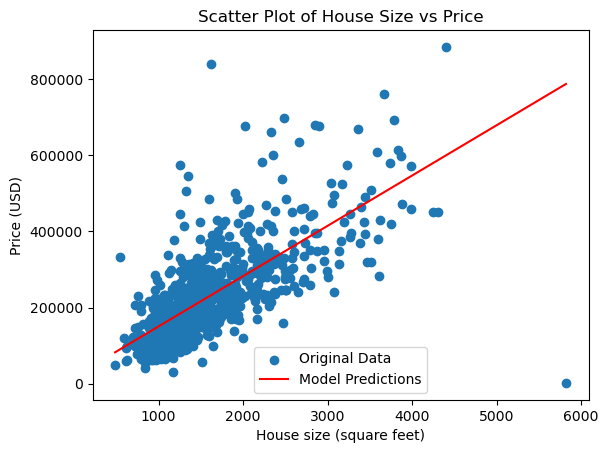

In [39]:
# This line calculates the minimum and maximum values of the "sq__ft" column in the sacramento dataset.
sqft_prediction_grid = sacramento[["sq__ft"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
sqft_prediction_grid["predicted"] = lm.predict(sqft_prediction_grid)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='Original Data')

# Plot the model predictions as a line
plt.plot(sqft_prediction_grid["sq__ft"], sqft_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('House size (square feet)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

# Show the plot
plt.show()

Don't worry about the details of this plot. This is simply depicting the predicted values of house price (red line) for the final linear regression model.



### Cross-validation

Now, lets look at how we can implement cross-validation for linear regression. Using cross-validation provides a more reliable and comprehensive evaluation of your model's performance compared to a single train-test split!

To perform 5-fold cross-validation in Python using `scikit-learn`, we need to follow these steps:
1. Set cv=5 for 5 folds.
2. Provide the predictors and response as X and y.
3. Use the `cross_validate` function from scikit-learn.
4. Convert the results into a pandas DataFrame for better visualization.


In [40]:
returned_dictionary = cross_validate(
    estimator=lm,
    cv=5,    # setting up the cross validation number
    X= sacramento[["sq__ft"]],
    y= sacramento["price"],
    scoring="neg_root_mean_squared_error" #or scoring="r2"
)

cv_5_df = pd.DataFrame(returned_dictionary)    # Converting it to pandas DataFrame

cv_5_df


,fit_time,score_time,test_score
0,0.001845,0.000639,-115422.285707
1,0.001658,0.000762,-99220.026608
2,0.001759,0.000811,-77991.048578
3,0.002844,0.001838,-66840.128297
4,0.002696,0.001050,-64944.273857


`test_score` column, displays the negative Root Mean Squared Prediction Error (RMSPE) values estimated during the cross-validation process.

To obtain the actual root mean squared prediction error values (the nonnegative), we need to take the absolute value of the `test_score` column.


In [41]:
cv_5_df["test_score"] = cv_5_df["test_score"].abs()
cv_5_df

,fit_time,score_time,test_score
0,0.001845,0.000639,115422.285707
1,0.001658,0.000762,99220.026608
2,0.001759,0.000811,77991.048578
3,0.002844,0.001838,66840.128297
4,0.002696,0.001050,64944.273857


We can then aggregate the 5 fold scores, to compute their mean and standard error of the mean, representing the estimated root mean squared prediction error and uncertainty around its estimate. 


In [42]:
cv_5_metrics = cv_5_df.agg(["mean","sem"])
cv_5_metrics

,fit_time,score_time,test_score
mean,0.002160,0.001020,84883.552609
sem,0.000252,0.000215,9769.327806


The RMSPE of $84,883 suggests that, on average, the model's price predictions deviate by about this amount from the actual prices.
The standard error indicates the degree of uncertainty around this estimate, meaning the error could be ± 9,769 (range from $75,114 to $94,652).

Since this estimate is based on cross-validation, it represents the model's error across different subsets of the data, rather than one random train-test split, which helps provide a more robust estimate of its performance compared to a single holdout test set!


These steps could also be repeated for r2, which is our other main metric for model evaluation.

In [43]:
returned_dictionary2 = cross_validate(
    estimator=lm,
    cv=5,    # setting up the cross validation number
    X=sacramento[["sq__ft"]],
    y=sacramento["price"],
    scoring="r2" 
)

cv_5_df2 = pd.DataFrame(returned_dictionary2)    # Converting it to pandas DataFrame

cv_5_df2

cv_5_metrics = cv_5_df2.agg(["mean","sem"])
cv_5_metrics


,fit_time,score_time,test_score
mean,0.002392,0.000912,0.481234
sem,0.000679,0.000186,0.083901


This means our predictor variable (square footage) explains roughly 48% ± 8% of the variance in housing prices.

By using cross-validation, we evaluate the model on different subsets of the data, rather than relying on a single train-test split. This reduces the risk of overfitting or underfitting based on a specific partition of the data. It also helps to ensure that the model's performance is more generalizable!


### Multivariable linear regression

Wouldn't it be nice if we could consider more than just one factor when making predictions? Multivariable linear regression lets us do just that by including multiple predictors. In the real world, outcomes like house prices depend on more than just one variable. For example, not only does the size of the house matter, but so do factors like the number of bedrooms, the location, and even the property’s condition.

With multivariable linear regression, we can take all of these into account, giving us a more accurate and realistic model. Here, we'll use the Sacramento real estate data to include both house size and number of bedrooms to predict sale prices. This opens the door to countless possibilities where we can model more complex relationships in various fields.

The equation for the multivariable regression is:

$$
\text{House sale price} = b_0 + b_1 \times (\text{house size}) + b_2 \times (\text{number of bedrooms})
$$

where:

- $b_0$ is the price when both house size and number of bedrooms are 0 (the intercept).
- $b_1$ is how much the price increases for each unit increase in house size (the slope for house size).
- $b_2$ is how much the price increases for each additional bedroom (the slope for number of bedrooms).

Using scikit-learn, we can easily include both predictors and fit the model as before.

#### **Step 1:** Fit the linear regression model on the training data.

In [46]:
# Multivariable Linear Regression (using both square footage and number of bedrooms as predictors)
mlm = LinearRegression()

mlm.fit(
    sacramento_train[["sq__ft", "beds"]],  # Two predictors: square footage and number of bedrooms
    sacramento_train["price"]  # Target variable: house prices
)

# Comparison: This is how simple linear regression would look, using only square footage
# lm.fit(
#    sacramento_train[["sq__ft"]],  # Single predictor: square footage
#    sacramento_train["price"]  # Target variable: house prices
# )

LinearRegression()

For each predictor in a multivariable linear regression model, we get a slope (coefficient) and an intercept, which together describe the best fit mathematically. In scikit-learn, we can extract these values from the model as follows:

Slopes (coefficients): These are obtained from the `coef_` property of the model.
Intercept: This is obtained from the `intercept_` property of the model.

In [47]:
mlm.coef_

array([   151.1817206 , -20996.77714783])

In [48]:
mlm.intercept_

56341.6051100234

So since we used sacramento_train[["sq__ft", "beds"]] when training, we have that `mlm.coef_[0]` corresponds to square feet, and `mlm.coef_[1]` corresponds to beds. 

Given the model output values:

- Intercept ($b_0$): 56,341
- Slope for house size ($ b_1$): 151
- Slope for number of bedrooms ($b_2$): -20,996

The equation of the plane of best fit is:

$$
\text{House sale price} = 56,341 + 151 \times (\text{house size}) -20,996 \times (\text{number of bedrooms})
$$

This equation describes how the house sale price is predicted based on both house size and the number of bedrooms.

#### **Step 2:** Make predictions on the test data set to assess the quality of our model.

In [50]:
# Predict house prices using the multivariable linear regression model (mlm) with two predictors: square footage and number of bedrooms.
# This is different from earlier examples where only square footage was used as a predictor.
sacramento_test["predicted"] = mlm.predict(sacramento_test[["sq__ft", "beds"]])

# Calculate RMSPE for the multivariable model.
lm_mult_test_RMSPE = mean_squared_error(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)**(1/2)

lm_mult_test_RMSPE

104438.56729994333

In [52]:
# Calculate R² 
lm_mult_test_r2 = r2_score( 
y_true=sacramento_test["price"], y_pred=sacramento_test["predicted"] 
)

lm_mult_test_r2

0.3167844099607501

Our model’s test error as assessed by RMSPE is $104,438 and $R^2$ is 0.32.


Once again, it would be best practice to perform cross-validation on our entire dataset, so our results aren't overly reliant on a single train-test split. By doing cross-validation, we evaluate the model's performance on different subsets of the data, ensuring that we obtain a more robust and reliable estimate of how the model will perform on unseen data. This also helps mitigate the risk of overfitting to a specific subset, making the model's performance assessment more generalizable to the broader dataset.

These steps are identical to above!

In [63]:
#scoring method as neg_root_mean_squared_error

returned_dictionary_mlm = cross_validate(
    estimator=mlm, 
    cv=5,    # setting up the cross validation number
    X=sacramento[["sq__ft", "beds"]],
    y=sacramento["price"],
    scoring="neg_root_mean_squared_error" 
)

cv_5_df_mlm = pd.DataFrame(returned_dictionary_mlm)    # Converting it to pandas DataFrame
cv_5_df_mlm["test_score"] = cv_5_df_mlm["test_score"].abs()

cv_5_df_mlm

,fit_time,score_time,test_score
0,0.006247,0.002390,117081.565378
1,0.001614,0.000498,98766.468504
2,0.000877,0.000436,78092.511515
3,0.000799,0.000636,66186.915479
4,0.002156,0.000534,63934.685283


In [62]:
#aggregate to obtain the mean and standard error across all 5 folds
cv_5_metrics_mlm = cv_5_df_mlm.agg(["mean","sem"])
cv_5_metrics_mlm

,fit_time,score_time,test_score
mean,0.003196,0.001052,84812.429232
sem,0.001375,0.000359,10158.640678


Our model’s test error, measured by Root Mean Squared Prediction Error (RMSPE), is $84,812 with a standard error ± $10,158.


In [64]:
#scoring method as r2

returned_dictionary_mlm2 = cross_validate(
    estimator=mlm, 
    cv=5,    # setting up the cross validation number
    X=sacramento[["sq__ft", "beds"]],
    y=sacramento["price"],
    scoring="r2" 
)

cv_5_df_mlm2 = pd.DataFrame(returned_dictionary_mlm2)    # Converting it to pandas DataFrame

cv_5_df_mlm2


,fit_time,score_time,test_score
0,0.003499,0.001362,0.153968
1,0.001584,0.000543,0.453647
2,0.001227,0.000771,0.511916
3,0.002102,0.000605,0.627089
4,0.000953,0.000450,0.657793


In [66]:
#aggregate to obtain the mean and standard error across all 5 folds
cv_5_metrics_mlm2 = cv_5_df_mlm2.agg(["mean","sem"])
cv_5_metrics_mlm2

,fit_time,score_time,test_score
mean,0.001873,0.000746,0.480882
sem,0.000450,0.000163,0.089792


This means our predictor variables (house size and number of bedrooms) explain roughly 48% ± 9% of the variance in housing prices

### Conclusion

In this notebook, we worked through several steps to predict housing prices using square feet using a data set of 932 real estate transactions in Sacramento, California. Here's a summary of what we covered:

1. **Simple Linear Regression:** We implemented simple linear regression and evaluated its performance on a test dataset. We then applied cross-validation to the entire dataset to assess how well the model generalizes to unseen data, ensuring that the model's performance was not dependent on a single train-test split.

2. **Multiple Linear Regression:** We implemented multiple linear regression. Similar to the simple linear regression step, we performed a train-test split and  and evaluated its performance on a test dataset, followed by cross-validation on the entire dataset.

By applying cross-validation in both the simple and multiple linear regression models, we ensured that the results were reliable and that our models generalized well across different data splits.

We hope this notebook has provided a practical understanding of data regression, model evaluation, and the application of machine learning algorithms like linear regression. Feel free to experiment further with the dataset or the code to enhance your learning!